<a href="https://colab.research.google.com/github/DangTanTai/AI/blob/main/FoodVN_DangTanTai_19146253.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import  image
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator
import numpy as np
import os
import cv2 as cv

In [ ]:
thuc_an = ['BanhMi','BanhUot','BanhXeo','ComTam','HeoQuay','KhoQuaNhoiThit','LongGaXaoMuop','Pho','ThitKho','Xoi']
dir_train = '/content/drive/MyDrive/FoodVN' 
distpath = []
y_train = []
x_train = []
x_test = []
y_test = []
# Tạo dữ liệu
def create_data(dir, x_train, y_train):
  for i in thuc_an:
    path = os.path.join(dir,i)
    index_label = thuc_an.index(i)
    for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)
create_data(dir_train, x_train, y_train) 
# xử lí dữ liệu
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train, 10)
print(x_train.shape) 
print(y_train.shape)
model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(27,48),
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same',
                 input_shape=(150,150,3),
                 strides=(9,16)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128,
                 kernel_size=(27,48), 
                 activation='relu',
                 kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu',input_shape=(67500,), name='layer1')) 
model.add(Dense(1028, activation='relu', name='layer2'))
model.add(Dense(1028, activation='relu', name='layer3'))
model.add(Dense(10, activation='softmax', name='layer4'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 100, verbose=1,batch_size=40)

(249, 150, 150, 3)
(249, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 17, 10, 32)        124448    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 5, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 5, 64)          2654272   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 2, 128)         10616960  
                                                                 
 max_pooling2d_2 (MaxPoolin

In [ ]:
model.save('food.h5')

Giá trị dự đoán: 0
Bánh Mì


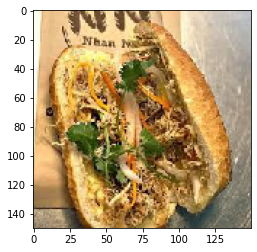

In [ ]:
filename = '/content/drive/MyDrive/Test_food/testbanhmi.jpg'  
food = image.load_img(filename, target_size=(150,150))
plt.imshow(food)
food = img_to_array(food)
food = food.reshape(1,150,150,3) 
food = food.astype('float32')
food = food/255
np.argmax(model.predict(food), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(food)))
if np.argmax(model.predict(food)) == 0:
   print("Bánh Mì")
if np.argmax(model.predict(food)) == 1:
   print("Bánh Ướt")
if np.argmax(model.predict(food)) == 2:
   print("Bánh Xèo")
if np.argmax(model.predict(food)) == 3:
   print("Cơm Tấm")
if np.argmax(model.predict(food)) == 4:
   print("Heo Quay")
if np.argmax(model.predict(food)) == 5:
   print("Khổ Qua Nhồi Thịt")
if np.argmax(model.predict(food)) == 6:
   print("Lòng Gà Xào Mướp")
if np.argmax(model.predict(food)) == 7:
   print("Phở")
if np.argmax(model.predict(food)) == 8:
   print("Thịt Kho")
if np.argmax(model.predict(food)) == 9:
   print("Xôi")


Giá trị dự đoán: 9
Xôi


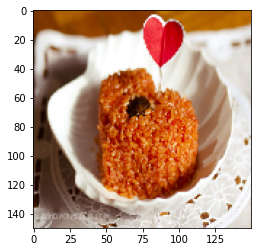

In [ ]:
filename1 = '/content/drive/MyDrive/Test_food/testxoi.jpg'  
food = image.load_img(filename1, target_size=(150,150)) 
plt.imshow(food)
food = img_to_array(food)
food = food.reshape(1,150,150,3) 
food = food.astype('float32')
food = food/255
np.argmax(model.predict(food), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(food)))
if np.argmax(model.predict(food)) == 0:
   print("Bánh Mì")
if np.argmax(model.predict(food)) == 1:
   print("Bánh Ướt")
if np.argmax(model.predict(food)) == 2:
   print("Bánh Xèo")
if np.argmax(model.predict(food)) == 3:
   print("Cơm Tấm")
if np.argmax(model.predict(food)) == 4:
   print("Heo Quay")
if np.argmax(model.predict(food)) == 5:
   print("Khổ Qua Nhồi Thịt")
if np.argmax(model.predict(food)) == 6:
   print("Lòng Gà Xào Mướp")
if np.argmax(model.predict(food)) == 7:
   print("Phở")
if np.argmax(model.predict(food)) == 8:
   print("Thịt Kho")
if np.argmax(model.predict(food)) == 9:
   print("Xôi")

Giá trị dự đoán: 8
Thịt Kho


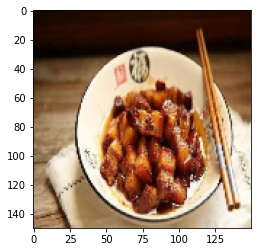

In [ ]:
filename2 = '/content/drive/MyDrive/Test_food/testthitkho.jpg'  
food = image.load_img(filename2, target_size=(150,150)) 
plt.imshow(food)
food = img_to_array(food)
food = food.reshape(1,150,150,3) 
food = food.astype('float32')
food = food/255
np.argmax(model.predict(food), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(food)))
if np.argmax(model.predict(food)) == 0:
   print("Bánh Mì")
if np.argmax(model.predict(food)) == 1:
   print("Bánh Ướt")
if np.argmax(model.predict(food)) == 2:
   print("Bánh Xèo")
if np.argmax(model.predict(food)) == 3:
   print("Cơm Tấm")
if np.argmax(model.predict(food)) == 4:
   print("Heo Quay")
if np.argmax(model.predict(food)) == 5:
   print("Khổ Qua Nhồi Thịt")
if np.argmax(model.predict(food)) == 6:
   print("Lòng Gà Xào Mướp")
if np.argmax(model.predict(food)) == 7:
   print("Phở")
if np.argmax(model.predict(food)) == 8:
   print("Thịt Kho")
if np.argmax(model.predict(food)) == 9:
   print("Xôi")

Giá trị dự đoán: 4
Heo Quay


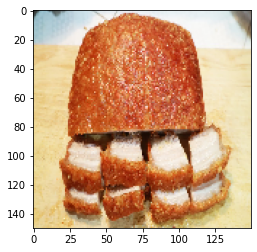

In [ ]:
filename3 = '/content/drive/MyDrive/Test_food/HeoQuay/2.jpg'  
food = image.load_img(filename3, target_size=(150,150)) 
plt.imshow(food)
food = img_to_array(food)
food = food.reshape(1,150,150,3) 
food = food.astype('float32')
food = food/255
np.argmax(model.predict(food), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(food)))
if np.argmax(model.predict(food)) == 0:
   print("Bánh Mì")
if np.argmax(model.predict(food)) == 1:
   print("Bánh Ướt")
if np.argmax(model.predict(food)) == 2:
   print("Bánh Xèo")
if np.argmax(model.predict(food)) == 3:
   print("Cơm Tấm")
if np.argmax(model.predict(food)) == 4:
   print("Heo Quay")
if np.argmax(model.predict(food)) == 5:
   print("Khổ Qua Nhồi Thịt")
if np.argmax(model.predict(food)) == 6:
   print("Lòng Gà Xào Mướp")
if np.argmax(model.predict(food)) == 7:
   print("Phở")
if np.argmax(model.predict(food)) == 8:
   print("Thịt Kho")
if np.argmax(model.predict(food)) == 9:
   print("Xôi")

Giá trị dự đoán: 7
Phở


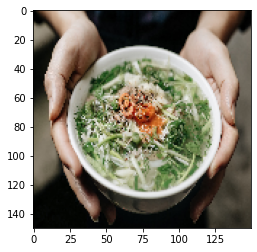

In [ ]:
filename3 = '/content/drive/MyDrive/Test_food/Pho/2.jpg'  
food = image.load_img(filename3, target_size=(150,150)) 
plt.imshow(food)
food = img_to_array(food)
food = food.reshape(1,150,150,3) 
food = food.astype('float32')
food = food/255
np.argmax(model.predict(food), axis=1)
print('Giá trị dự đoán:', np.argmax(model.predict(food)))
if np.argmax(model.predict(food)) == 0:
   print("Bánh Mì")
if np.argmax(model.predict(food)) == 1:
   print("Bánh Ướt")
if np.argmax(model.predict(food)) == 2:
   print("Bánh Xèo")
if np.argmax(model.predict(food)) == 3:
   print("Cơm Tấm")
if np.argmax(model.predict(food)) == 4:
   print("Heo Quay")
if np.argmax(model.predict(food)) == 5:
   print("Khổ Qua Nhồi Thịt")
if np.argmax(model.predict(food)) == 6:
   print("Lòng Gà Xào Mướp")
if np.argmax(model.predict(food)) == 7:
   print("Phở")
if np.argmax(model.predict(food)) == 8:
   print("Thịt Kho")
if np.argmax(model.predict(food)) == 9:
   print("Xôi")